# A6b Part A: ARCH_GARCH Model

In [1]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [2]:
# Get the data for asianpaints
ticker = "ASIANPAINT.NS" 

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1307.45
Distribution:                  Normal   AIC:                           2620.91
Method:            Maximum Likelihood   BIC:                           2634.72
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        22:22:40   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0692  5.305e-02      1.305      0.192 [-3.47

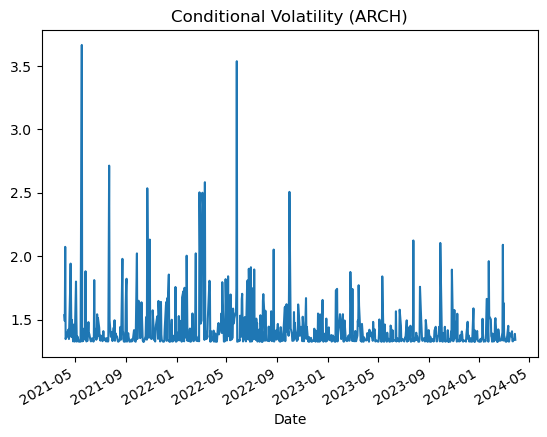

In [3]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1288.43
Distribution:                  Normal   AIC:                           2584.86
Method:            Maximum Likelihood   BIC:                           2603.28
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        22:22:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.9840e-03  4.794e-02  8.310e-02      0.934 

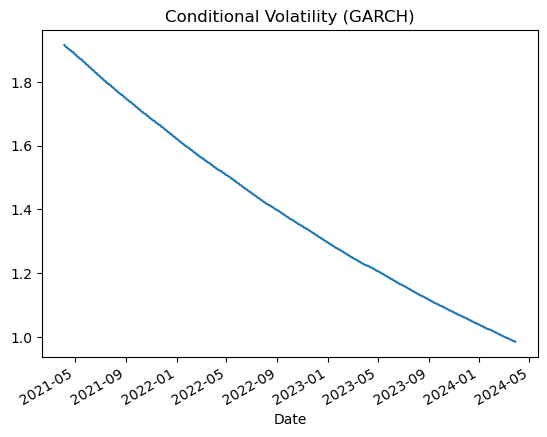

In [4]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [5]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Iteration:     10,   Func. Count:     67,   Neg. LLF: 1288.4285626318783
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1288.4283929148585
            Iterations: 12
            Function evaluations: 76
            Gradient evaluations: 12


In [6]:
forecasts = res.forecast()

In [7]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-21,2845.000000,2845.399902,2806.000000,2821.149902,2794.115234,1167680,-0.132750
2024-03-22,2821.149902,2855.149902,2808.000000,2841.500000,2814.270508,1652689,0.721347
2024-03-26,2820.000000,2844.149902,2810.000000,2814.649902,2787.677734,1372390,-0.944926
2024-03-27,2817.949951,2842.850098,2817.699951,2830.500000,2803.375732,1156231,0.563121
2024-03-28,2835.050049,2868.000000,2819.000000,2846.750000,2819.470215,1864623,0.574111


In [9]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.003984
                 h.1
Date                
2024-03-28  0.971531
                 h.1
Date                
2024-03-28  0.971531


In [10]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01     h.02      h.03      h.04      h.05      h.06  \
Date                                                                    
2024-03-28  0.971531  0.96978  0.968033  0.966289  0.964548  0.962811   

                h.07      h.08      h.09      h.10  ...     h.81      h.82  \
Date                                                ...                      
2024-03-28  0.961076  0.959344  0.957616  0.955891  ...  0.84102  0.839504   

                h.83      h.84      h.85      h.86      h.87     h.88  \
Date                                                                    
2024-03-28  0.837992  0.836482  0.834975  0.833471  0.831969  0.83047   

                h.89      h.90  
Date                            
2024-03-28  0.828974  0.827481  

[1 rows x 90 columns]


In [11]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,0.971531,0.96978,0.968033,0.966289,0.964548,0.962811,0.961076,0.959344,0.957616,0.955891,...,0.84102,0.839504,0.837992,0.836482,0.834975,0.833471,0.831969,0.83047,0.828974,0.827481


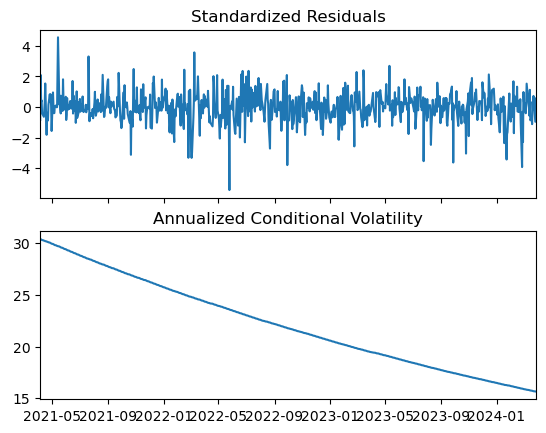

In [12]:
fig = res.plot(annualize="D")